In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import scipy.optimize as opt
from sklearn.metrics import classification_report#这个包是评价报告
import matplotlib.pyplot as plt
import matplotlib

## 1. Multi-class Classification

In [2]:
data_1=sio.loadmat('/Users/yangguangqiang/Music/career-2021/ML-startup/吴恩达/ML-homework-main/ex3-neural network/ex3data1.mat')
data_x=data_1["X"]
data_y=data_1["y"]
print(data_x.shape) # 5000个训练示例；每一张图是一个 20X20 的矩阵  
print(data_y.shape) #Y: 5000-dimensional vector 记录所有图片的分类

(5000, 400)
(5000, 1)


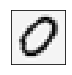

this should be [10]


In [18]:
### visualize picture
def plot_an_image(image):
    fig, ax = plt.subplots(figsize=(1, 1))
    ax.matshow(image.reshape((20,20)), cmap=matplotlib.cm.binary) # 20X20 的 mat
    plt.xticks(np.array([]))  # get rid of ticks
    plt.yticks(np.array([]))
    plt.show()
plot_an_image(data_x[369, :])
print('this should be {}'.format(data_y[369]))

In [ ]:
# define sigmoid-cost-gradient function (the same as HW2)

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [4]:
def regularize_cost(theta, X, Y,fi=1):
    theta_1 = theta[1:]
    first = Y * np.log(sigmoid(X@theta.T))
    second = (1 - Y) * np.log(1 - sigmoid(X@theta.T))
    third=fi*np.power(theta_1,2).sum()/(2*len(X))
    return -1 * np.mean(first + second)+third

In [5]:
def regularize_gradient(theta, X, Y,fi=1):
    theta_1= theta[1:]
    regularize_num= fi/len(X) * theta_1
    regularized_term = np.concatenate([np.array([0]), regularize_num]) # theta0 不加
    
    return  (1/len(X) * X.T @ (sigmoid(X @ theta.T) - Y)) + regularized_term #矩阵加法，每一项加一个

In [6]:
def opti_gradient(X, Y,fi=1):
    
    theta=np.zeros(X.shape[1])
    optimized_result=opt.minimize(fun=regularize_cost, x0=np.array(theta), 
                                  args=(X, np.array(Y)), method='TNC', jac=regularize_gradient)
    return optimized_result.x

In [7]:
def predict(theta,X):
    probability=sigmoid(X @ theta.T)
    return [1 if x>=0.5 else 0 for x in probability]  #threshold 设置为0.5

In [8]:
# process data, X+X0=1 ; Y convert to (10,5000)

In [9]:
X=np.insert(data_x, 0, values=1, axis=1)
Y=np.zeros([10,5000])
for f in range(len(data_y)):
    if data_y[f][0]==10:  
        Y[0][f]=1
    else:
        Y[data_y[f][0]][f]=1
print(X.shape)
print(Y.shape)

(5000, 401)
(10, 5000)


In [10]:
## 当只有1类时，取Y[0]

In [11]:
theta_0=opti_gradient(X, Y[0],fi=1)
predictions_0=predict(theta_0,X)
print(classification_report(Y[0], predictions_0))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4500
         1.0       0.99      0.98      0.99       500

    accuracy                           1.00      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       1.00      1.00      1.00      5000



In [ ]:
## 一共有10类

In [12]:
theta_k=np.array([opti_gradient(X, Y[k],fi=1) for k in range(10)])
theta_k.shape

(10, 401)

In [13]:
prob_matrix = sigmoid(X @ theta_k.T)
prob_matrix.shape

(5000, 10)

In [14]:
y_pred = np.argmax(prob_matrix, axis=1) # 返回每行最大的列索引,表示取这一列的概率最大
y_pred = np.array([10 if i == 0 else i for i in y_pred])
y_pred

array([10, 10, 10, ...,  9,  9,  7])

In [15]:
print(classification_report(data_y, y_pred))

              precision    recall  f1-score   support

           1       0.95      0.99      0.97       500
           2       0.95      0.92      0.93       500
           3       0.95      0.91      0.93       500
           4       0.95      0.95      0.95       500
           5       0.92      0.92      0.92       500
           6       0.97      0.98      0.97       500
           7       0.95      0.95      0.95       500
           8       0.93      0.92      0.92       500
           9       0.92      0.92      0.92       500
          10       0.97      0.99      0.98       500

    accuracy                           0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000



## 2.神经网络--forward 传播

In [ ]:
## 逻辑回归-不能形成更复杂的假设，只是一个线性分类器。
## 神经网络能够表示非线性假设的复杂模型--实现前馈传播算法以使用训练出的权重进行预测

In [17]:
data_w=sio.loadmat('/Users/yangguangqiang/Music/career-2021/ML-startup/吴恩达/ML-homework-main/ex3-neural network/ex3weights.mat')
print(data_w['Theta1'].shape,data_w['Theta2'].shape)
data_1=sio.loadmat('/Users/yangguangqiang/Music/career-2021/ML-startup/吴恩达/ML-homework-main/ex3-neural network/ex3data1.mat')
print(data_1["X"].shape,data_1["y"].shape)

(25, 401) (10, 26)
(5000, 400) (5000, 1)


In [18]:
X=np.insert(data_1["X"], 0, values=1, axis=1)
theta_1=data_w['Theta1'] ; theta_2=data_w['Theta2']
a_1=X
z_2=np.dot(X,theta_1.T)
z_2=np.insert(z_2, 0, values=1, axis=1)
a_2=sigmoid(z_2)

In [19]:
z_3=np.dot(a_2,theta_2.T)
a_3=sigmoid(z_3)
print(a_3)
print(a_3.shape)

[[1.38245045e-04 2.05540079e-03 3.04012453e-03 ... 4.91017499e-04
  7.74325818e-03 9.96229459e-01]
 [5.87756717e-04 2.85026516e-03 4.14687943e-03 ... 2.92311247e-03
  2.35616705e-03 9.96196668e-01]
 [1.08683616e-04 3.82659802e-03 3.05855129e-02 ... 7.51453949e-02
  6.57039547e-03 9.35862781e-01]
 ...
 [6.27824726e-02 4.50406476e-03 3.54510925e-02 ... 2.63669734e-03
  6.89448164e-01 2.74369466e-05]
 [1.01908736e-03 7.34360211e-04 3.78558700e-04 ... 1.45616578e-02
  9.75989758e-01 2.33374461e-04]
 [5.90807037e-05 5.41717668e-04 2.58968308e-05 ... 7.00508308e-03
  7.32814653e-01 9.16696059e-02]]
(5000, 10)


In [20]:
pre_y=np.argmax(a_3, axis=1)+1 
print(classification_report(data_1["y"], pre_y))

              precision    recall  f1-score   support

           1       0.97      0.98      0.97       500
           2       0.98      0.97      0.97       500
           3       0.98      0.96      0.97       500
           4       0.97      0.97      0.97       500
           5       0.98      0.98      0.98       500
           6       0.97      0.99      0.98       500
           7       0.98      0.97      0.97       500
           8       0.98      0.98      0.98       500
           9       0.97      0.96      0.96       500
          10       0.98      0.99      0.99       500

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000

